## Business Objectives 
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who <b>default</b> cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the <b>driving factors (or driver variables)</b> behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 



## Importing packages

In [3]:
#Load the libraryss
import pandas as pd #To work with dataset
pd.set_option('display.max_rows', 130, 'display.max_columns', 130)
pd.options.display.float_format = '{:,.2f}'.format

import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

import matplotlib as mpl
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

## Creating dataset

In [4]:
data = pd.read_csv('loan\loan.csv',index_col=False, dtype='unicode')

In [5]:
data.head()

id member_id loan_amnt funded_amnt funded_amnt_inv        term  \
0  1077501   1296599      5000        5000            4975   36 months   
1  1077430   1314167      2500        2500            2500   60 months   
2  1077175   1313524      2400        2400            2400   36 months   
3  1076863   1277178     10000       10000           10000   36 months   
4  1075358   1311748      3000        3000            3000   60 months   

  int_rate installment grade sub_grade                 emp_title emp_length  \
0   10.65%      162.87     B        B2                       NaN  10+ years   
1   15.27%       59.83     C        C4                     Ryder   < 1 year   
2   15.96%       84.33     C        C5                       NaN  10+ years   
3   13.49%      339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%       67.79     B        B5  University Medical Group     1 year   

  home_ownership annual_inc verification_status issue_d  loan_status  \
0           RENT      24000            Verified  Dec-11   Fully Paid   
1           RENT      30000     Source Verified  Dec-11  Charged Off   
2           RENT      12252        Not Verified  Dec-11   Fully Paid   
3           RENT      49200     Source Verified  Dec-11   Fully Paid   
4           RENT      80000     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti delinq_2yrs  \
0              Computer    860xx         AZ  27.65           0   
1                  bike    309xx         GA      1           0   
2  real estate business    606xx         IL   8.72           0   
3              personel    917xx         CA     20           0   
4              Personal    972xx         OR  17.94           0   

  earliest_cr_line inq_last_6mths mths_since_last_delinq  \
0           Jan-85              1                    NaN   
1           Apr-99              5                    NaN   
2           Nov-01              2                    NaN   
3           Feb-96              1                     35   
4           Jan-96              0                     38   

  mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc  \
0                    NaN        3       0     13648     83.70%         9   
1                    NaN        3       0      1687      9.40%         4   
2                    NaN        2       0      2956     98.50%        10   
3                    NaN       10       0      5598        21%        37   
4                    NaN       15       0     27783     53.90%        38   

  initial_list_status out_prncp out_prncp_inv  total_pymnt total_pymnt_inv  \
0                   f         0             0  5863.155187         5833.84   
1                   f         0             0      1008.71         1008.71   
2                   f         0             0  3005.666844         3005.67   
3                   f         0             0     12231.89        12231.89   
4                   f    524.06        524.06      3513.33         3513.33   

  total_rec_prncp total_rec_int total_rec_late_fee recoveries  \
0            5000        863.16                  0          0   
1    

In [6]:
data.shape

(39717, 111)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


In [8]:
data.describe()

id member_id loan_amnt funded_amnt funded_amnt_inv        term  \
count     39717     39717     39717       39717           39717       39717   
unique    39717     39717       885        1041            8205           2   
top     1077501   1296599     10000       10000            5000   36 months   
freq          1         1      2833        2741            1309       29096   

       int_rate installment  grade sub_grade emp_title emp_length  \
count     39717       39717  39717     39717     37258      38642   
unique      371       15383      7        35     28820         11   
top      10.99%      311.11      B        B3   US Army  10+ years   
freq        956          68  12020      2917       134       8879   

       home_ownership annual_inc verification_status issue_d loan_status  \
count           39717      39717               39717   39717       39717   
unique              5       5318                   3      55           3   
top              RENT      60000        Not Verified  Dec-11  Fully Paid   
freq            18899       1505               16921    2260       32950   

       pymnt_plan                                                url   desc  \
count       39717                                              39717  26777   
unique          1                                              39717  26527   
top             n  https://lendingclub.com/browse/loanDetail.acti...          
freq        39717                                                  1    210   

                   purpose               title zip_code addr_state    dti  \
count                39717               39706    39717      39717  39717   
unique                  14               19615      823         50   2868   
top     debt_consolidation  Debt Consolidation    100xx         CA      0   
freq                 18641                2184      597       7099    183   

       delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq  \
count        39717            39717          39717                  14035   
unique          11              526              9                     95   
top              0           Nov-98              0                      0   
freq         35405              370          19300                    443   

       mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc  \
count                    2786    39717   39717     39717      39667     39717   
unique                    111       40       5     21711       1089        82   
top                         0        7       0         0         0%        16   
freq                      670     4018   37601       994        977      1471   

       initial_list_status out_prncp out_prncp_inv  total_pymnt  \
count                39717     39717         39717        39717   
unique                   1      1137          1138        37850   
top                      f         0             0  11196.56943   
freq                 39717     38577         38577           26   

       total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee  \
count            39717           39717         39717              39717   
unique           37518            7976         35148               1356   
top                  0           10000             0                  0   
freq               165            2293            71              37671   

       recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt  \
count       39717                   39717        39646           39717   
unique       4040                    2616          101           34930   
top             0                       0       May-16               0   
freq        35499                   35935         1256              74   

       next_pymnt_d last_credit_pull_d collections_12_mths_ex_med  \
count          1140              39715                      39661   
unique            2                106                          1   
top          Jun-16       

<AxesSubplot:>

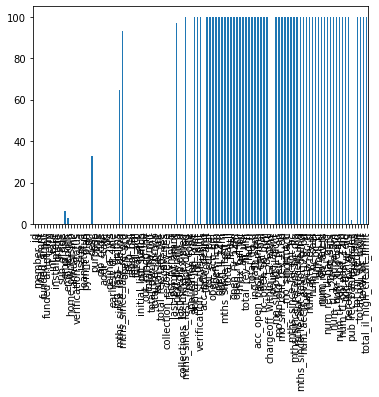

In [9]:
((data.isna().sum()/data.shape[0])*100).plot(kind='bar')

### Data Cleaning
- Need to fix rows and columns
- Need to fix missing values
- Need to standardise values
- Need to fix invalid values
- Need to  filter data

#### 1. Checklist for Fixing Rows
#### 2. Checklist for Fixing Columns
#### 3. Checklist for missing values
#### 4. Checklist for Standardise values
#### 5. Checklist for Fixing invalid values
#### 6. Checklist for Filtering Data

In [10]:
#Check the number of null values in the columns
data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [11]:
#Drop the columns, which is gt than 25000 null values
data_NULL = data[data.columns[data.isnull().sum() > 25000]]
data_NULL.shape

(39717, 57)

In [12]:
#Check the shape of the dataframe
data_NULL.head()

mths_since_last_delinq mths_since_last_record next_pymnt_d  \
0                    NaN                    NaN          NaN   
1                    NaN                    NaN          NaN   
2                    NaN                    NaN          NaN   
3                     35                    NaN          NaN   
4                     38                    NaN       Jun-16   

  mths_since_last_major_derog annual_inc_joint dti_joint  \
0                         NaN              NaN       NaN   
1                         NaN              NaN       NaN   
2                         NaN              NaN       NaN   
3                         NaN              NaN       NaN   
4                         NaN              NaN       NaN   

  verification_status_joint tot_coll_amt tot_cur_bal open_acc_6m open_il_6m  \
0                       NaN          NaN         NaN         NaN        NaN   
1                       NaN          NaN         NaN         NaN        NaN   
2                       NaN          NaN         NaN         NaN        NaN   
3                       NaN          NaN         NaN         NaN        NaN   
4                       NaN          NaN         NaN         NaN        NaN   

  open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m  \
0         NaN         NaN                NaN          NaN     NaN         NaN   
1         NaN         NaN                NaN          NaN     NaN         NaN   
2         NaN         NaN                NaN          NaN     NaN         NaN   
3         NaN         NaN                NaN          NaN     NaN         NaN   
4         NaN         NaN                NaN          NaN     NaN         NaN   

  open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl  \
0         NaN        NaN      NaN              NaN    NaN         NaN   
1         NaN        NaN      NaN              NaN    NaN         NaN   
2         NaN        NaN      NaN              NaN    NaN         NaN   
3         NaN        NaN      NaN              NaN    NaN         NaN   
4         NaN        NaN      NaN              NaN    NaN         NaN   

  inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util  \
0          NaN                  NaN         NaN            NaN     NaN   
1          NaN                  NaN         NaN            NaN     NaN   
2          NaN                  NaN         NaN            NaN     NaN   
3          NaN                  NaN         NaN            NaN     NaN   
4          NaN                  NaN         NaN            NaN     NaN   

  mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op  \
0                NaN                  NaN                   NaN   
1                NaN                  NaN                   NaN   
2                NaN                  NaN                   NaN   
3                NaN                  NaN                   NaN   
4                NaN                  NaN                   NaN   

  mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq  \
0            NaN      NaN                  NaN                      NaN   
1            NaN      NaN                  NaN                      NaN   
2            NaN      NaN                  NaN                      NaN   
3            NaN      NaN                  NaN                      NaN   
4            NaN      NaN                  NaN                      NaN   

  mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd  \
0                   NaN                            NaN                   NaN   
1                   NaN                            NaN                   NaN   
2                   NaN                            NaN                   NaN   
3                   NaN                            NaN                   NaN   
4                   NaN                            NaN                   NaN   

  num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl  \
0      

In [13]:
#lets drop the column from data contains null more than 25000 rows
data = data.drop(data_NULL, axis=1)


In [14]:
data.shape

(39717, 54)

In [15]:
# still processing to find any null after cleaning of columns > 25000
data.columns[data.isnull().any()].tolist()  #data.columns[data.isna().any()].tolist()

['emp_title',
 'emp_length',
 'desc',
 'title',
 'revol_util',
 'last_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'chargeoff_within_12_mths',
 'pub_rec_bankruptcies',
 'tax_liens']

In [16]:
#check one coulmn
data['emp_title'][data['emp_title'].isnull()]

0        NaN
2        NaN
8        NaN
30       NaN
42       NaN
        ... 
39700    NaN
39704    NaN
39706    NaN
39714    NaN
39715    NaN
Name: emp_title, Length: 2459, dtype: object

In [21]:
#fill all nan at data set with 0 value.
data.fillna(0,inplace=True)
data.emp_length.replace(['n/a'],0,inplace=True)

<AxesSubplot:>

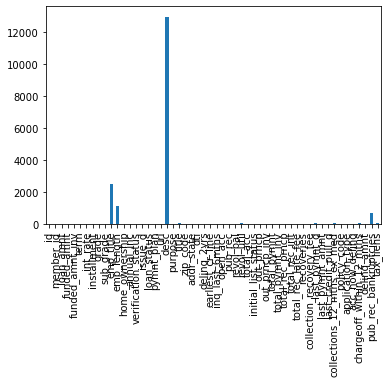

In [22]:
#Check zero values 
(data == 0).sum().plot(kind='bar')

In [31]:
try:
    data = data.drop(['desc'], axis=1)
except:
    print("desc_column - Already dropped")
data.shape  

desc_column - Already dropped


(39717, 53)

In [32]:
## cleaning rows - Remove loan status in current

In [34]:
data_chargeoff = data[data['loan_status'] == 'Charged Off']
data_chargeoff.shape

(5627, 53)

In [35]:
data_fullypaid = data[data['loan_status'] == 'Fully Paid']
data_fullypaid.shape

(32950, 53)

## Identify Categorical Columns
Count of no of unique values in the column

In [36]:
# to indetify the unique values in columns to use for categorical
data_chargeoff_unique_count_data = []
for values in data_chargeoff.columns.tolist():
    data_chargeoff_unique_count_data.append({'header': values, 'counts': len(data_chargeoff[values].unique())})

In [37]:
data_chargeoff_unique_count = pd.DataFrame(data_chargeoff_unique_count_data).sort_values('counts',ascending = True)

In [39]:
data_chargeoff_unique_count.head(5)

header  counts
34     out_prncp_inv       1
50       delinq_amnt       1
16       loan_status       1
48    acc_now_delinq       1
47  application_type       1

## Creating derived columns

In [44]:
#data_chargeoff.info()
def clean_emplen(val):
    #return int(val.replace("year","").replace("years","").replace("+",""))
    return str(val.replace("+ years","").replace(" years","").replace(" year","").replace("< ",""))

In [45]:
try:
    data.int_rate = data.int_rate.apply(lambda x: x.replace("%","")).astype("float64")
except:
    print ("Processed already!")
    
#data.int_rate
try:
    data.term = data.term.apply(lambda x: x.replace(" months","")).astype("int")
except:
    print ("Processed already!")    
#data.term

try:
    data.emp_length = data.emp_length.apply(lambda x: x if type(x) != str else clean_emplen(x))
except:
    print ("Processed already!")      
#data.emp_length

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 39717, dtype: object

In [46]:
data = data[-(data['last_pymnt_d'] == "")]
data = data[-data['last_pymnt_d'].isnull()]
data = data[-(data['earliest_cr_line'] == "")]
data.shape

(39717, 53)

In [48]:
#data[data['last_pymnt_d'].isna()]
#data.to_excel("output.xlsx") 
#data.info()

In [49]:
#data['issue_d_month'] = pd.to_datetime(data['issue_d']).dt.month
from datetime import datetime
data['issue_d_month']  = data['issue_d'].apply(lambda x: datetime.strptime(x, "%b-%y")).dt.month
data['issue_d_year']  = data['issue_d'].apply(lambda x: datetime.strptime(x, "%b-%y")).dt.year


#data['last_pymnt_d_month']  = data['last_pymnt_d'].apply(lambda x: datetime.strptime(x, "%b-%y")).dt.month
#data['last_pymnt_d_year']  = data['last_pymnt_d'].apply(lambda x: datetime.strptime(x, "%b-%y")).dt.year

#data['earliest_cr_line_month']  = data['earliest_cr_line'].apply(lambda x: datetime.strptime(x, "%b-%y")).dt.month
#data['earliest_cr_line_year']  = data['earliest_cr_line'].apply(lambda x: datetime.strptime(x, "%b-%y")).dt.year

#data.head()

## Updated column datatype

In [55]:
columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'dti', 
          'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
          'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'emp_length' ]
data[columns] = data[columns].astype(np.float64)

In [57]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  object 
 1   member_id                   39717 non-null  object 
 2   loan_amnt                   39717 non-null  float64
 3   funded_amnt                 39717 non-null  float64
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  int32  
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   39717 non-null  object 
 11  emp_length                  39717 non-null  float64
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397